# **Part 2: Exploratory data analysis**
---

Exploratory data analysis (EDA) is an approach to analyzing and summarizing data sets that involves visualizing and exploring the data to gain insights and identify patterns, trends, and outliers.<br>



In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

## Exploring *success* factors

Success factors we have identified include popularity and profit.


In [3]:
success_data = pd.read_pickle('success.pkl')
success_data

,popularity,profit
0,32.985763,1.363529e+09
1,28.419936,2.284364e+08
2,13.112507,1.852382e+08
3,11.173104,1.868178e+09
4,9.335014,1.316249e+09
...,...,...
1282,1.549139,1.547778e+08
1283,1.910465,1.301957e+08
1284,1.778746,7.497449e+07
1285,1.198849,6.970000e+07


In [4]:
success_data.info()
popularity_data = success_data[['popularity']]
profit_data = success_data[['profit']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   popularity  1287 non-null   float64
 1   profit      1287 non-null   float64
dtypes: float64(2)
memory usage: 20.2 KB


### *popularity*

In [5]:
popularity_data.describe()

,popularity
count,1287.000000
mean,1.786022
std,2.172137
min,0.010335
25%,0.664783
50%,1.152354
75%,2.125342
max,32.985763


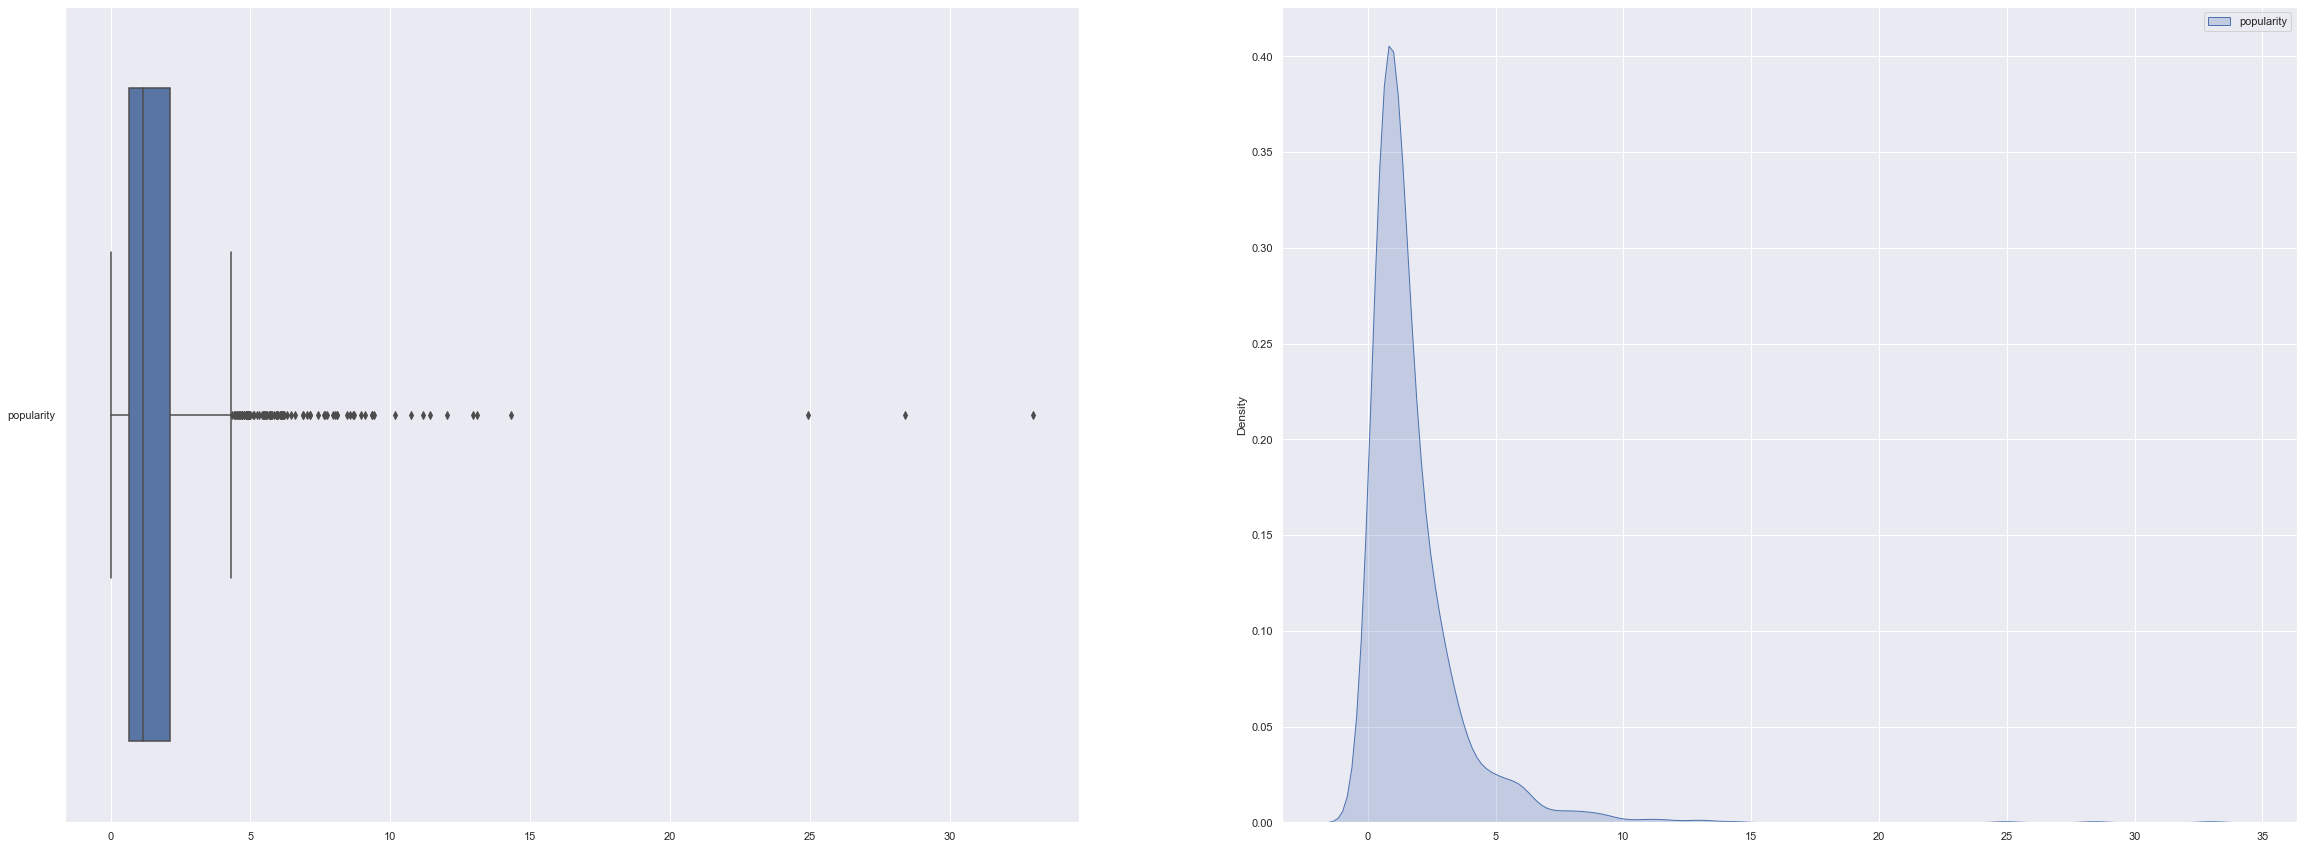

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(40, 15))
#Box Plot
sb.boxplot(ax = axs[0], data=popularity_data, orient='h')

#KDE plot
sb.kdeplot(ax = axs[1], data=popularity_data, shade=True)
plt.show()

### *profit*

In [7]:
profit_data.describe()

,profit
count,1.287000e+03
mean,1.242409e+08
std,2.183462e+08
min,-4.139124e+08
25%,3.142641e+06
50%,4.524300e+07
75%,1.470070e+08
max,2.544506e+09


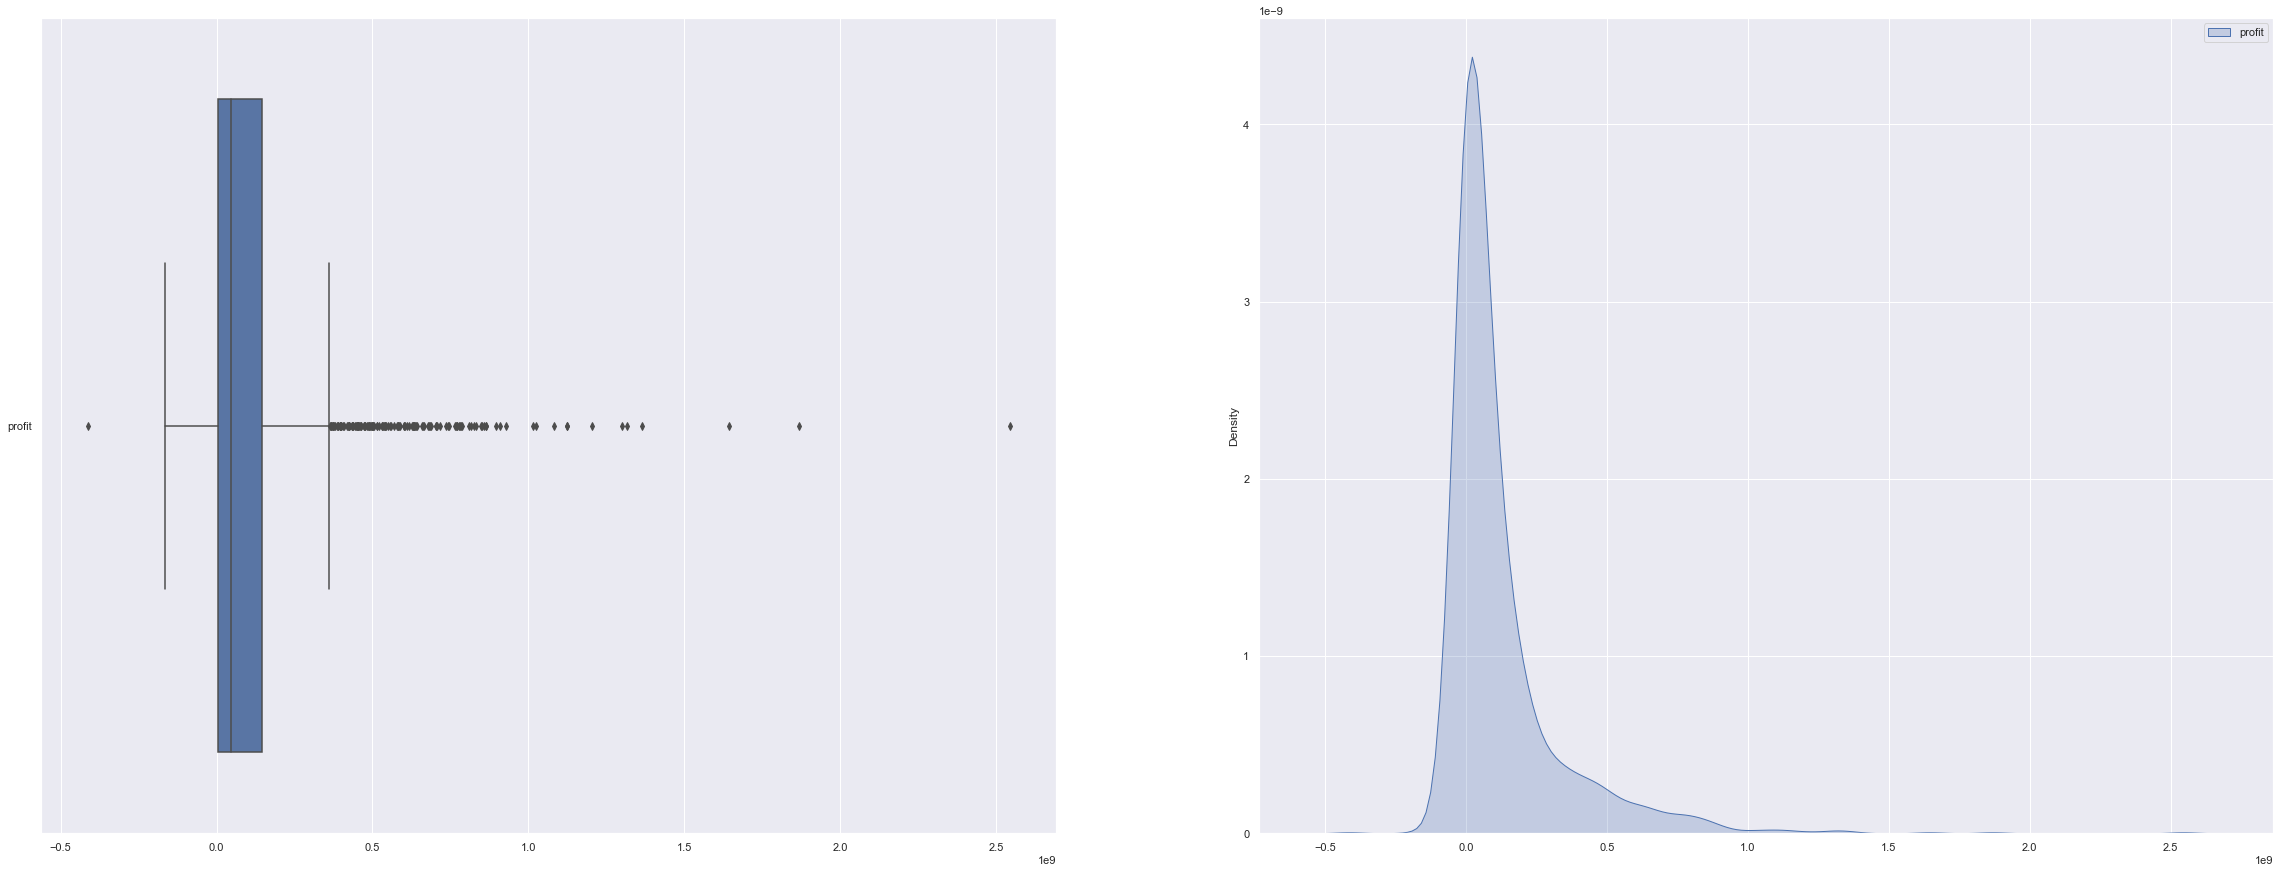

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(40, 15))
#Box Plot
sb.boxplot(ax = axs[0], data=profit_data, orient='h')

#KDE plot
sb.kdeplot(ax = axs[1], data=profit_data, shade=True)

plt.show()


### correlation between *popularity* and *profit*

,popularity,profit
popularity,1.000000,0.582064
profit,0.582064,1.000000


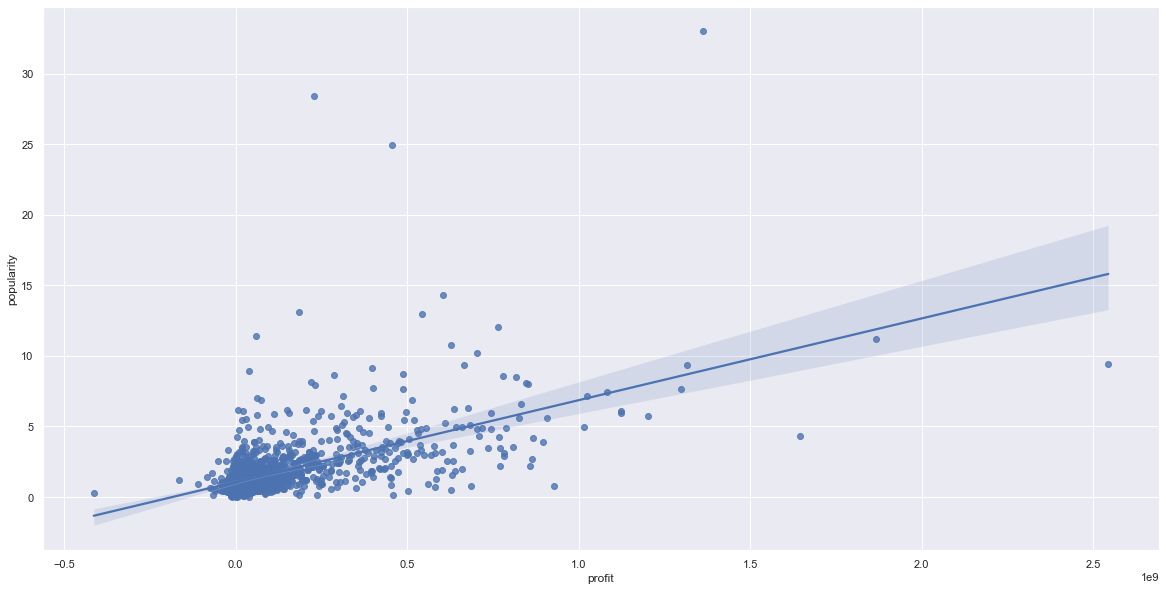

In [11]:
plt.figure(figsize=(20, 10))
jointDF = pd.concat([popularity_data, profit_data], axis = 1)
sb.regplot(x="profit", y="popularity", data=jointDF)
jointDF.corr()

## Exploring potential factors affecting success of movie

In [8]:
factors = pd.read_pickle('factors.pkl')
factors

,budget,release_year,release_date,runtime,month
0,150000000.0,2015,2015-06-09,124,06
1,150000000.0,2015,2015-05-13,120,05
2,110000000.0,2015,2015-03-18,119,03
3,200000000.0,2015,2015-12-15,136,12
4,190000000.0,2015,2015-04-01,137,04
...,...,...,...,...,...
1282,7000000.0,1973,1973-07-05,121,07
1283,11000000.0,1965,2065-12-16,130,12
1284,7000000.0,1969,2069-12-12,142,12
1285,300000.0,1978,1978-10-25,91,10


### **Exploring categorical factors**

### *genre*

In [9]:
genre = pd.read_pickle('encoded_genre.pkl')
genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1283,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1284,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1285,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [10]:
genre_distribution = genre.sum(axis=0)
genre_distribution

Action             415
Adventure          297
Animation          108
Comedy             414
Crime              193
Documentary         15
Drama              535
Family             163
Fantasy            154
Foreign              1
History             35
Horror             139
Music               38
Mystery             98
Romance            196
Science Fiction    209
Thriller           399
War                 32
Western             13
dtype: object

<AxesSubplot:>

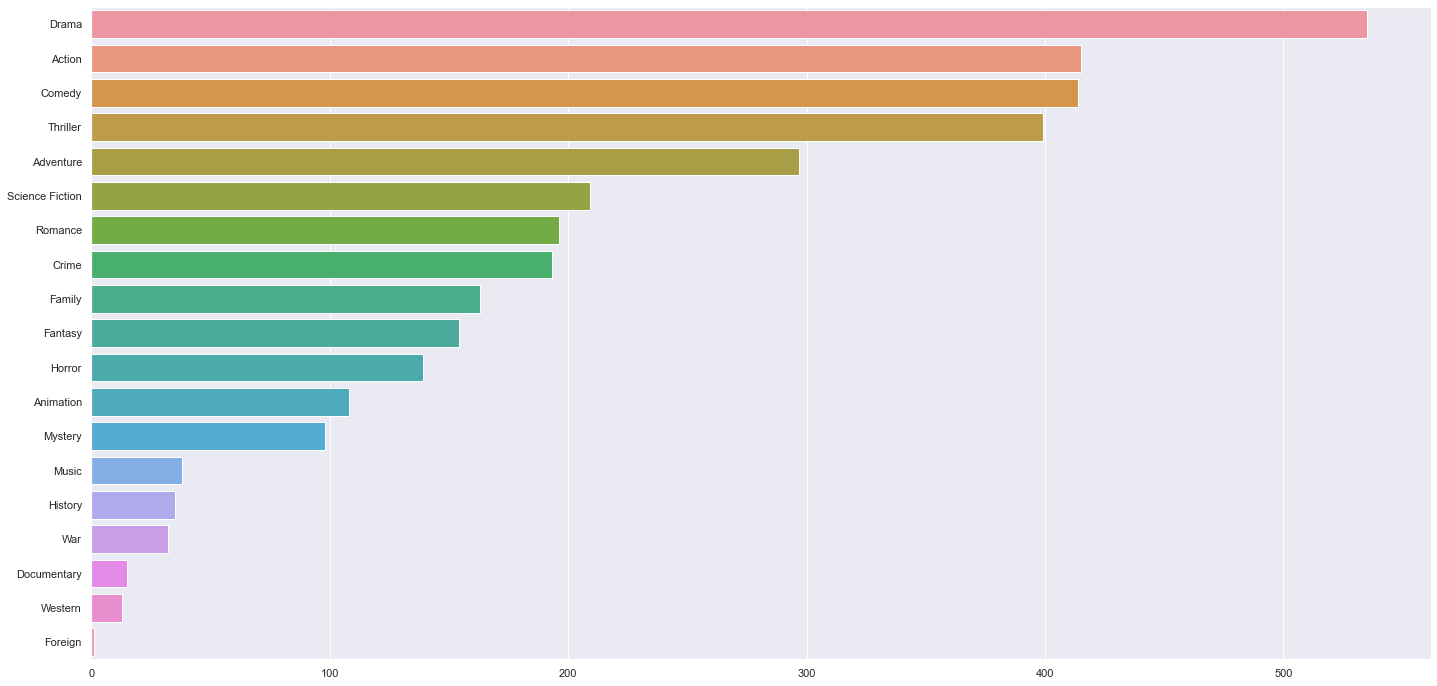

In [11]:
plt.figure(figsize=(24, 12))
genre_distribution.sort_values(ascending=False, inplace=True)
sb.barplot(y=genre_distribution.index, x=genre_distribution.values, orient='h')


### *cast*

In [12]:
cast = pd.read_pickle('cast.pkl')
cast

,cast
0,Chris Pratt
0,Bryce Dallas Howard
0,Irrfan Khan
0,Vincent D'Onofrio
0,Nick Robinson
...,...
1286,John Belushi
1286,Tim Matheson
1286,John Vernon
1286,Verna Bloom


In [13]:
cast.describe()

,cast
count,6418
unique,2977
top,Matt Damon
freq,22


### *director*

In [14]:
director = pd.read_pickle('director.pkl')
director

,director
0,Colin Trevorrow
1,George Miller
2,Robert Schwentke
3,J.J. Abrams
4,James Wan
...,...
1282,Guy Hamilton
1283,Terence Young
1284,Peter R. Hunt
1285,John Carpenter


In [15]:
director.describe()

,director
count,1411
unique,835
top,John Carpenter
freq,12


### *production_companies*

In [16]:
prod_comp = pd.read_pickle('production_companies.pkl')
prod_comp

,production_companies
0,Universal Studios
0,Amblin Entertainment
0,Legendary Pictures
0,Fuji Television Network
0,Dentsu
...,...
1285,Compass International Pictures
1285,Falcon International Productions
1286,Universal Pictures
1286,Oregon Film Factory


In [17]:
prod_comp.describe()

,production_companies
count,4050
unique,1577
top,Universal Pictures
freq,120


### *release_year*

In [18]:
release_year = pd.DataFrame(factors['release_year'])
release_year

,release_year
0,2015
1,2015
2,2015
3,2015
4,2015
...,...
1282,1973
1283,1965
1284,1969
1285,1978


In [19]:
release_year.value_counts()

release_year
2011            156
2010            132
2009            116
2015             93
2007             92
2012             88
2008             82
2014             70
2006             68
2013             65
2005             51
2004             43
2003             30
2002             24
1999             22
2001             18
2000             14
1996             13
1998             11
1997              8
1995              8
1993              7
1981              6
1992              5
1983              5
1994              5
1990              4
1989              4
1987              4
1971              4
1984              4
1979              4
1982              3
1975              3
1991              2
1978              2
1964              2
1973              2
1977              2
1980              2
1985              2
1988              2
1962              1
1974              1
1972              1
1986              1
1969              1
1967              1
1965              1
1963   

### *release_month*

In [20]:
release_month = pd.DataFrame(factors['month'])
release_month


,month
0,06
1,05
2,03
3,12
4,04
...,...
1282,07
1283,12
1284,12
1285,10


In [21]:
release_month.value_counts()

month
09       169
12       131
10       123
11       110
05       105
08       105
06       102
03       101
07       100
04        88
02        77
01        76
dtype: int64

<AxesSubplot:xlabel='month'>

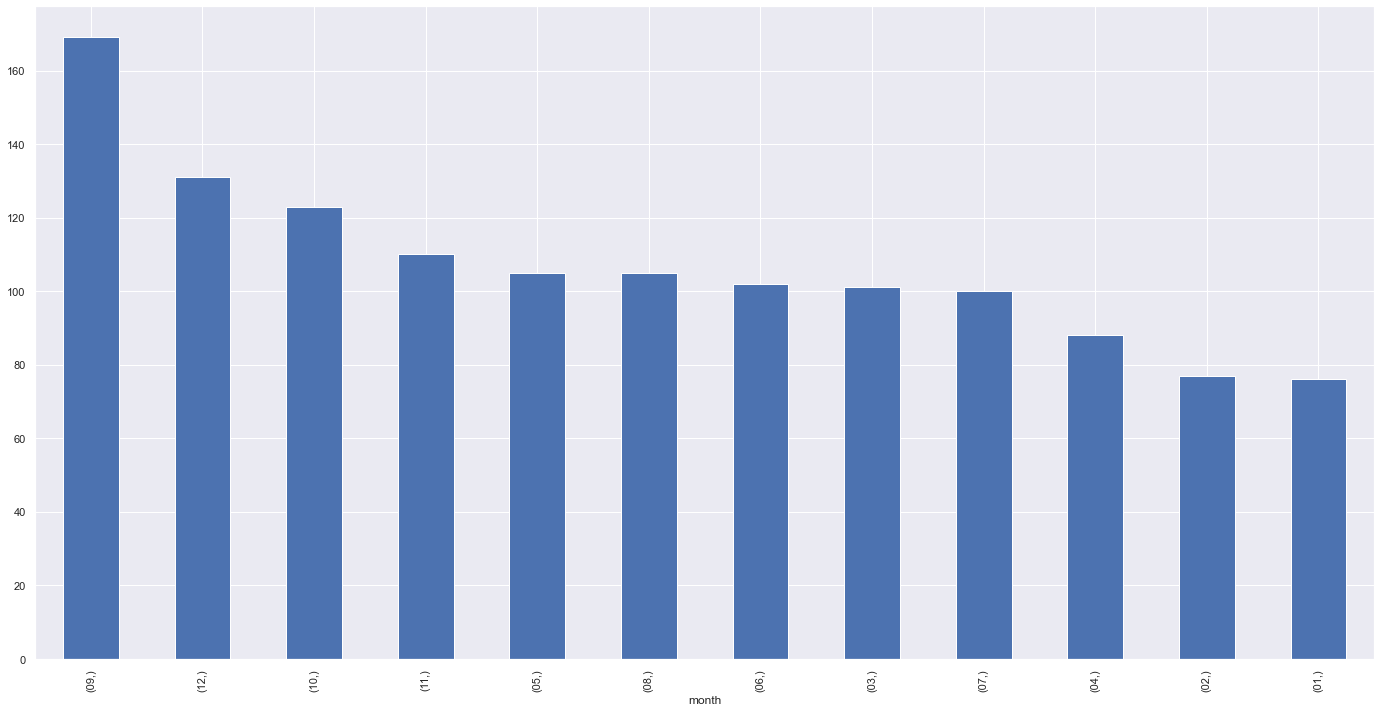

In [22]:
plt.figure(figsize=(24, 12))
release_month.value_counts().plot(kind='bar')

### **Exploring numerical factors**

### *budget*

In [23]:
budget = pd.DataFrame(factors['budget'])
budget

,budget
0,150000000.0
1,150000000.0
2,110000000.0
3,200000000.0
4,190000000.0
...,...
1282,7000000.0
1283,11000000.0
1284,7000000.0
1285,300000.0


In [24]:
budget.describe()

,budget
count,1.287000e+03
mean,5.200349e+07
std,5.514540e+07
min,1.000000e+00
25%,1.400000e+07
50%,3.200000e+07
75%,7.000000e+07
max,4.250000e+08


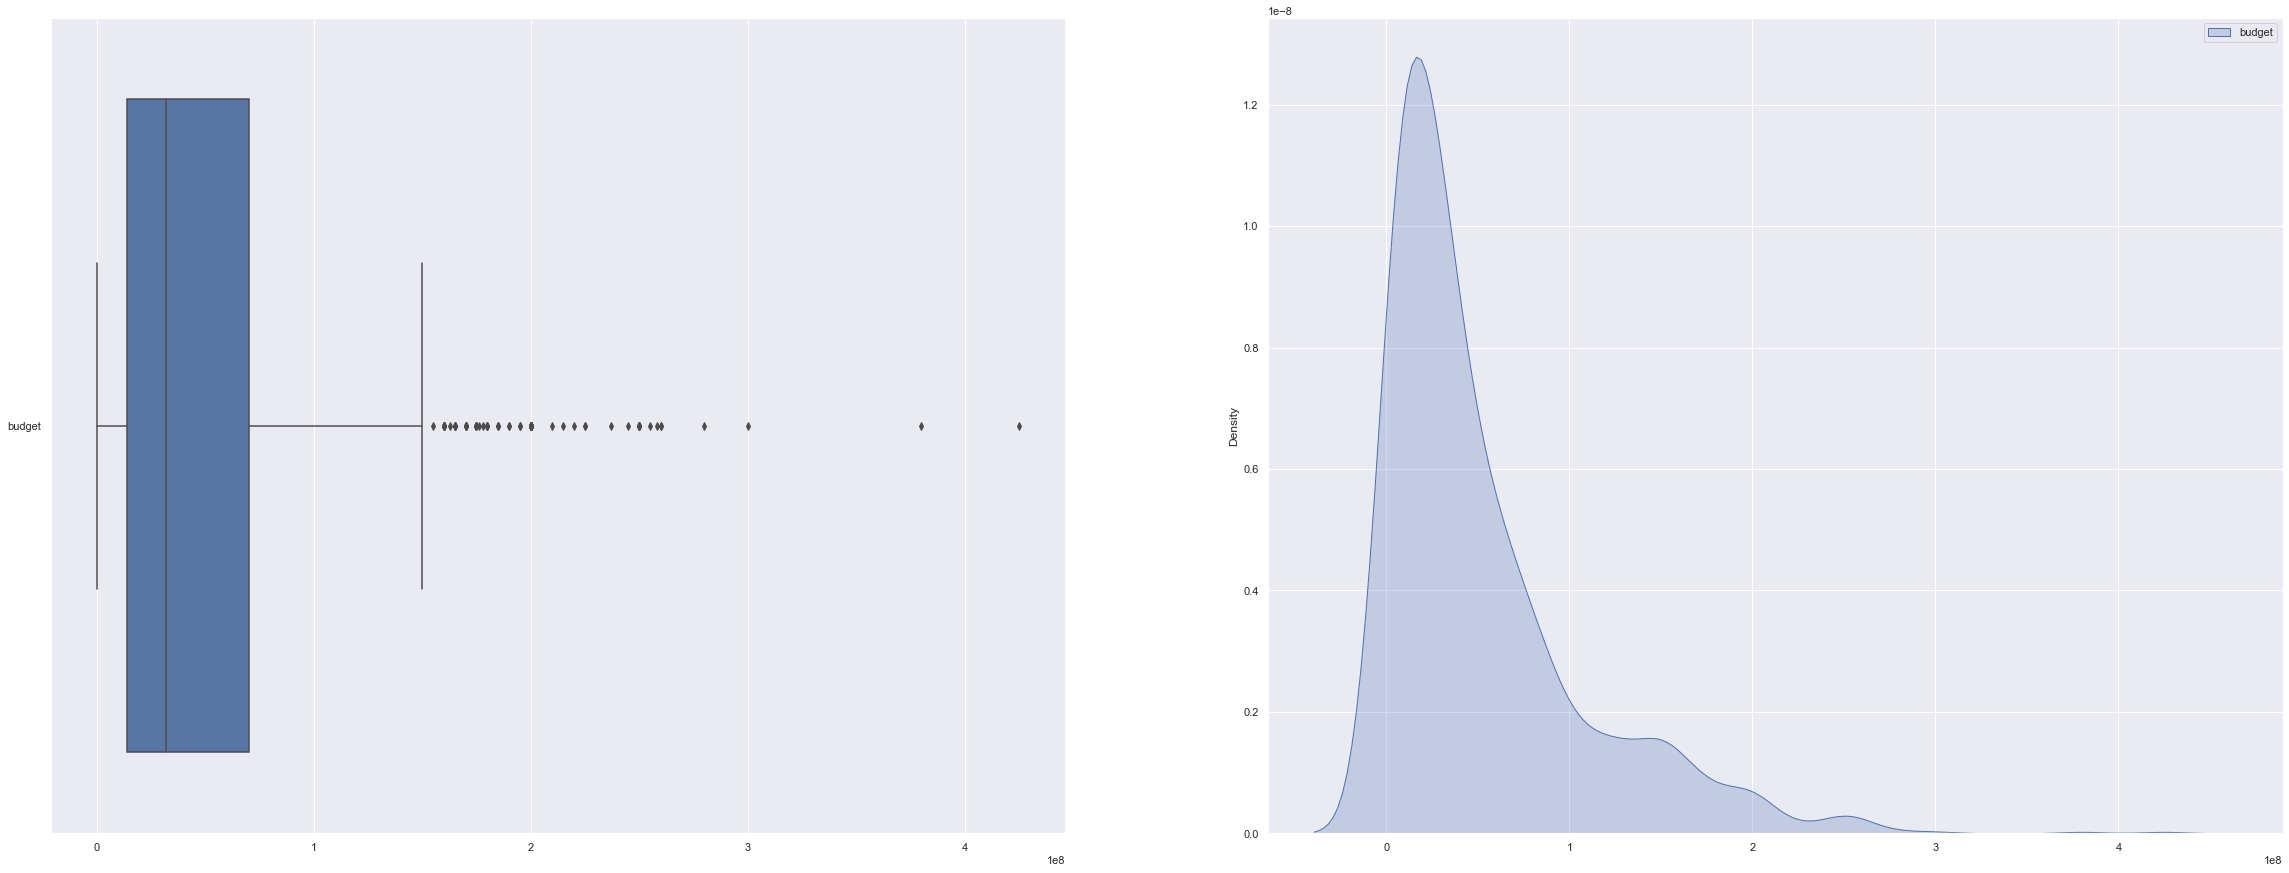

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(40, 15))
#Box Plot
sb.boxplot(ax = axs[0], data=budget, orient='h')

#KDE plot
sb.kdeplot(ax = axs[1], data=budget, shade=True)

plt.show()


### *runtime*

In [26]:
runtime = pd.DataFrame(factors['runtime'])
runtime

,runtime
0,124
1,120
2,119
3,136
4,137
...,...
1282,121
1283,130
1284,142
1285,91


In [27]:
runtime.describe()

,runtime
count,1287.000000
mean,110.273504
std,18.811369
min,63.000000
25%,97.000000
50%,107.000000
75%,121.000000
max,201.000000


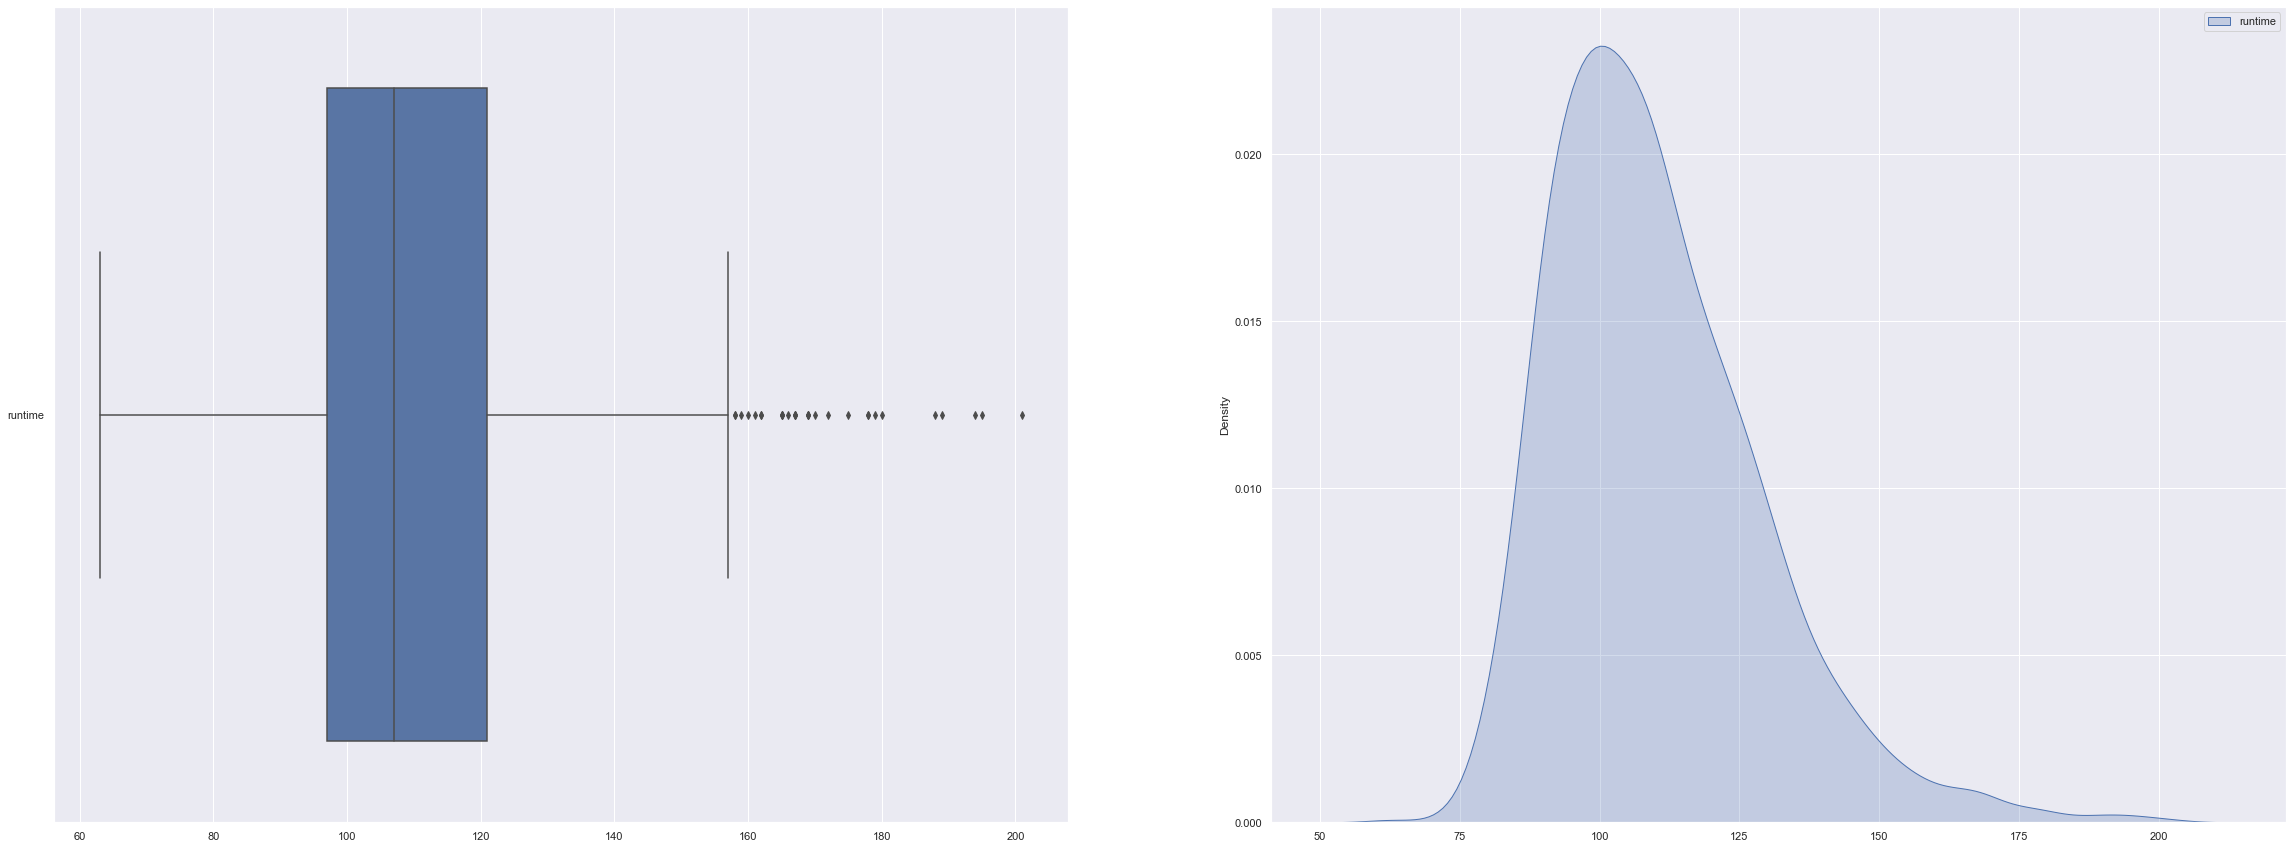

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(40, 15))
#Box Plot
sb.boxplot(ax = axs[0], data=runtime, orient='h')

#KDE plot
sb.kdeplot(ax = axs[1], data=runtime, shade=True)

plt.show()